In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [13]:
# Import necessary modules
from pycaret.classification import *
import streamlit as st
import pandas as pd
import numpy as np
from pycaret.datasets import get_data

In [14]:
# Load data
credit_card_df = pd.read_csv('card_transdata.csv')
credit_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [15]:
# Transform water quality feature into binary (safe or not_safe)
credit_card_df.fraud = np.where(credit_card_df.fraud>= 1,'not fraudulent', 'fraudulent')
credit_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,fraudulent
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,fraudulent
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,fraudulent
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,fraudulent
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,fraudulent


In [16]:
len(credit_card_df[credit_card_df['fraud']==0])

0

In [17]:
len(credit_card_df[credit_card_df['fraud']==1])

0

In [18]:
credit_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


In [19]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 61.0+ MB


In [20]:
credit_card = setup(credit_card_df, target = 'fraud', use_gpu = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,fraud
2,Target Type,Binary
3,Label Encoded,"fraudulent: 0, not fraudulent: 1"
4,Original Data,"(1000000, 8)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
2022-09-30 02:15:28.123 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-30 02:15:28.131 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-30 02:15:28.135 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='fraud',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer

In [21]:
#credit_card_best = compare_models(3)

In [22]:
credit_card_dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
1,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0,0.9999,0.9998,0.9998,0.9998,0.9998,0.9998
3,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0,0.9998,0.9997,1.0000,0.9998,0.9998,0.9998
5,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0,0.9999,0.9998,0.9998,0.9998,0.9998,0.9998
7,1.0,0.9999,0.9998,1.0000,0.9999,0.9999,0.9999
8,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 1
2022-09-30 02:15:49.415 INFO    logs: create_model_container: 1
INFO:logs:master_model_container: 1
2022-09-30 02:15:49.426 INFO    logs: master_model_container: 1
INFO:logs:display_container: 2
2022-09-30 02:15:49.436 INFO    logs: display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
2022-09-30 02:15:49.441 INFO    logs: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
       

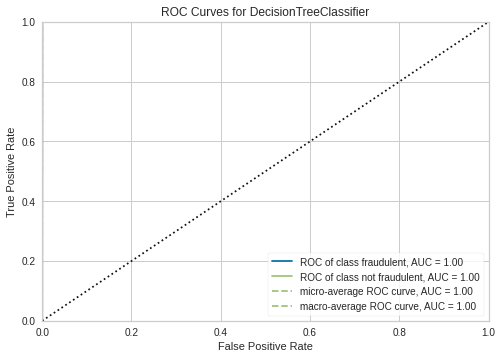

INFO:logs:Visual Rendered Successfully
2022-09-30 02:15:50.642 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-30 02:15:50.816 INFO    logs: plot_model() succesfully completed......................................


In [23]:
plot_model(credit_card_dt)

In [24]:
save_model(credit_card_dt, 'credit_card_dt_deployment_model')

INFO:logs:Initializing save_model()
2022-09-30 02:15:50.851 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=credit_card_dt_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='fraud',
    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='fraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        

In [25]:
# find the minimum of each column
minValues = print(credit_card_df.min())

distance_from_home                  0.004874
distance_from_last_transaction      0.000118
ratio_to_median_purchase_price      0.004399
repeat_retailer                          0.0
used_chip                                0.0
used_pin_number                          0.0
online_order                             0.0
fraud                             fraudulent
dtype: object


In [26]:
# find the maximum of each column
maxValues = print(credit_card_df.max())

distance_from_home                  10632.723672
distance_from_last_transaction      11851.104565
ratio_to_median_purchase_price        267.802942
repeat_retailer                              1.0
used_chip                                    1.0
used_pin_number                              1.0
online_order                                 1.0
fraud                             not fraudulent
dtype: object


In [27]:
#Creating the web app with streamlit
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np


def predict_quality(model, df):
    
    predictions_data = predict_model(estimator = model, data = df)
    
    return predictions_data['Label'][0]
    
model = load_model('credit_card_dt_deployment_model')


st.title('Credit Card Fraud Detection framework')
st.write('This is a web-based framework to detect credit card fraud in transactions by Okeke')


Distance_from_home = st.sidebar.slider(label = 'distance_from_home', min_value = 0.001,
                          max_value = 10632.734,
                          value = 5000.000,
                          step = 10.000)

Distance_from_last_transaction = st.sidebar.slider(label = 'distance_from_last_transaction', min_value = 0.0001,
                          max_value = 11851.105,
                          value = 100.000,
                          step = 5.000)
                          
Ratio_to_median_purchase_price = st.sidebar.slider(label = 'ratio_to_median_purchase_price', min_value = 0.005,
                          max_value = 267.803,
                          value = 50.000,
                          step = 5.000)  
 
Repeat_retailer = st.sidebar.slider(label = 'repeat_retailer', min_value = 0.000,
                          max_value = 1.000,
                          value = 0.500,
                          step = 0.100)                       

Used_chip = st.sidebar.slider(label = 'used_chip', min_value = 0.000,
                          max_value = 1.000,
                          value = 0.500,
                          step = 0.100)

Used_pin_number = st.sidebar.slider(label = 'used_pin_number', min_value = 0.000,
                          max_value = 1.000,
                          value = 0.500,
                          step = 0.100)

Online_order = st.sidebar.slider(label = 'online_order', min_value = 0.000,
                          max_value = 1.000,
                          value = 0.500,
                          step = 0.100)

features = {'Distance_from_home': Distance_from_home, 'Distance_from_last_transaction': Distance_from_last_transaction,
            'Ratio_to_median_purchase_price': Ratio_to_median_purchase_price, 'Repeat_retailer': Repeat_retailer,
            'Used_chip': Used_chip, 'Used_pin_number': Used_pin_number,
            'Online_order':Online_order}
 

features_df  = pd.DataFrame([features])

st.table(features_df)  

if st.button('Predict'):
    
    prediction = predict_quality(model, features_df)
    
    st.write('Based on the parameters provided, the transaction is {}'+ str(prediction))

INFO:logs:Initializing load_model()
2022-09-30 02:15:51.544 INFO    logs: Initializing load_model()
INFO:logs:load_model(model_name=credit_card_dt_deployment_model, platform=None, authentication=None, verbose=True)
2022-09-30 02:15:51.549 INFO    logs: load_model(model_name=credit_card_dt_deployment_model, platform=None, authentication=None, verbose=True)
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-09-30 02:15:51.644 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


Transformation Pipeline and Model Successfully Loaded
